In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Food_Delivery_Times.csv')
data

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [7]:
X_features = ['Distance_km','Preparation_Time_min','Courier_Experience_yrs']
X = np.array(data[['Distance_km','Preparation_Time_min','Courier_Experience_yrs']])
X

array([[ 7.93, 12.  ,  1.  ],
       [16.42, 20.  ,  2.  ],
       [ 9.52, 28.  ,  1.  ],
       ...,
       [15.62, 26.  ,  2.  ],
       [14.17,  8.  ,  0.  ],
       [ 6.63, 24.  ,  3.  ]])

In [9]:
Y = np.array(data['Delivery_Time_min'])
Y

array([ 43,  84,  59,  37,  68,  57,  49,  46,  35,  73,  88,  76,  53,
        36,  33,  35,  50,  24,  27,  47,  72,  58,  37,  56,  73,  64,
        56,  70,  70, 123,  52, 108,  45, 111,  44,  73,  45,  61,  34,
        47,  52,  67,  32,   8,  36,  67,  43,  36,  36,  56,  56,  47,
       104,  50,  31,  35,  44,  23,  61,  82,  69,  69,  60,  40,  38,
        52,  68,  31,  54,  87,  62,  22,  42, 111,  51,  41,  69,  49,
        48,  46,  92,  32,  71,  65,  43,  58,  68,  28,  44,  70,  74,
        72,  48,  69,  49,  14,  30,  73,  42,  45,  76,  94,  28,  80,
        57,  35,  69,  87,  31,  70,  37,  57,  52,  65,  74,  69,  44,
        73,  91,  27,  65,  79,  41,  77,  26,  58,  56, 141,  44,  78,
        29,  59,  62,  80, 105,  82,  91,  30,  92,  16, 116,  75,  25,
        37,  28,  49,  60,  36,  49, 113,  43,  60,  17,  41,  54,  66,
        33,  32,  61,  64,  37,  69,  68,  32,  68,  30,  60,  46,  85,
        47,  65,  44,  48,  75,  24,  47,  31,  43,  54,  80,  4

In [14]:
mean_value = np.nanmean(X)  # Compute mean ignoring NaNs
X[np.isnan(X)] = mean_value  # Replace NaNs with mean
mean_value = np.nanmean(Y)
Y[np.isnan(Y)] = mean_value

In [10]:
scalar = StandardScaler()
X_norm = scalar.fit_transform(X)
X_norm

array([[-0.37408542, -0.69185319, -1.22880708],
       [ 1.11700846,  0.41911139, -0.88550556],
       [-0.09483462,  1.53007597, -1.22880708],
       ...,
       [ 0.97650491,  1.25233482, -0.88550556],
       [ 0.72184224, -1.24733548, -1.5721086 ],
       [-0.60240368,  0.97459368, -0.54220405]])

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.4, random_state=23)

In [16]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_train,Y_train)
print(sgdr)
print(sgdr.t_)

SGDRegressor(max_iter=10000)
84001.0


In [20]:
Y_train_pred = sgdr.predict(X_train)
Y_train_pred

array([58.853064  , 68.30981818, 45.16822753, 89.85490368, 60.78076328,
       43.41013859, 40.17571786, 58.08800817, 44.46636272, 47.10352511,
       61.04662116, 67.04815852, 58.63186641, 40.93059688, 67.22270394,
       36.34851095, 59.96269324, 80.51434414, 51.29472553, 62.81748157,
       37.34326497, 62.65465595, 63.75473182, 54.88068899, 85.4104267 ,
       40.76800377, 78.03123579, 51.119937  , 54.02255578, 63.75852038,
       29.61331872, 26.40799697, 71.08192284, 68.41185172, 68.37438823,
       68.76122803, 48.78051574, 81.67061496, 79.09284443, 61.35988682,
       32.55460046, 38.58181239, 65.20922105, 43.24294836, 30.98679782,
       76.14078866, 81.9274955 , 42.02229765, 73.52696545, 62.47791234,
       67.51944134, 38.10512946, 60.25236759, 76.18004327, 50.31183243,
       83.67802293, 65.93451879, 56.25535696, 43.69392495, 65.26511328,
       58.61750457, 55.56662276, 66.48675212, 45.95880512, 80.61598677,
       79.54740883, 77.91007431, 86.00769006, 35.91436214, 83.48

<function matplotlib.pyplot.show(close=None, block=None)>

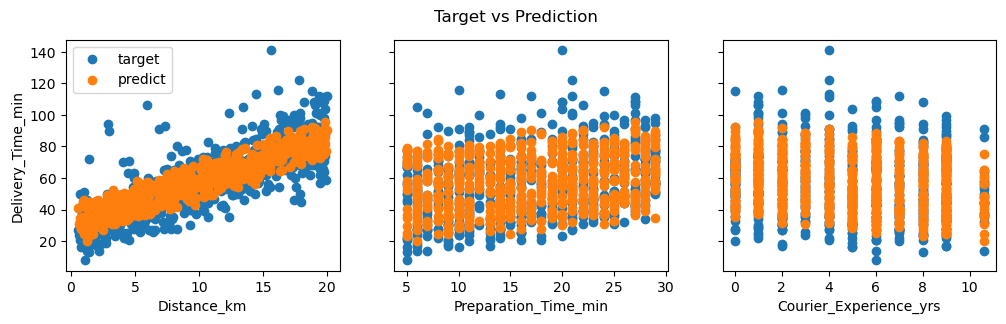

In [24]:
fig, axes = plt.subplots(1,3,figsize=(12,3),sharey=True)

for i in range(len(axes)):
    axes[i].scatter(X_train[:,i],Y_train,label = 'target')
    axes[i].set_xlabel(X_features[i])
    axes[i].scatter(X_train[:,i],Y_train_pred,label = 'predict')
axes[0].set_ylabel('Delivery_Time_min')
axes[0].legend()
fig.suptitle("Target vs Prediction")
plt.show

In [26]:
Y_test_pred = sgdr.predict(X_test)
Y_test_pred

array([44.53949802, 37.48216478, 53.43944293, 84.66030319, 72.66424571,
       43.93624792, 57.97820178, 60.80766408, 39.79767081, 88.746083  ,
       38.25618233, 37.51165467, 63.78103539, 27.91221212, 55.38748021,
       32.90234403, 42.83020649, 41.93980414, 70.95515492, 36.11125359,
       73.25534275, 42.16162013, 72.20111606, 43.43764163, 44.22679782,
       36.39346017, 48.23448049, 64.99528727, 55.6395679 , 39.0017299 ,
       44.20091692, 54.12457873, 62.13832193, 68.79329642, 64.95384506,
       76.764974  , 50.47902266, 54.82707253, 49.50932371, 53.83285054,
       61.70446526, 72.98230924, 67.4483085 , 54.16525473, 38.73545993,
       46.89655884, 51.87285035, 36.17323455, 50.12470569, 46.14536639,
       56.71393185, 79.81824415, 82.72244271, 65.30199013, 83.28342644,
       71.5450419 , 50.19207116, 25.36692207, 74.11943094, 36.07697642,
       69.49139385, 53.41095176, 88.01987472, 67.17070963, 53.1562694 ,
       30.30982578, 52.0617682 , 50.60500319, 39.55691703, 34.37

<function matplotlib.pyplot.show(close=None, block=None)>

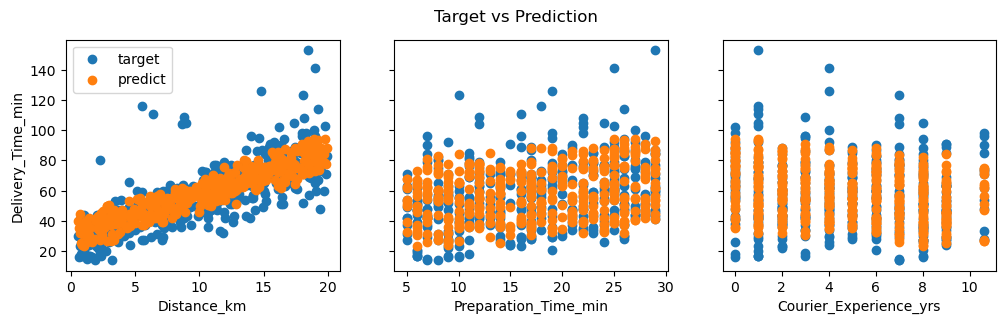

In [29]:
fig, axes = plt.subplots(1,3,figsize=(12,3),sharey=True)

for i in range(len(axes)):
    axes[i].scatter(X_test[:,i],Y_test,label = 'target')
    axes[i].set_xlabel(X_features[i])
    axes[i].scatter(X_test[:,i],Y_test_pred,label = 'predict')
axes[0].set_ylabel('Delivery_Time_min')
axes[0].legend()
fig.suptitle("Target vs Prediction")
plt.show